# Goal: Removing white border sourrounding to object in an image

1. Applying global thresholding
2. find dark pixels: find the x, y coordinates of black pixels using np.argwhere and np.fliplr
3. From these dark pixel locations (x, y) find the x,y, h and w using cv2.boundingRect
4. crop the original image using x,y, h and w

In [15]:
import numpy as np
print(np.__version__)
import matplotlib.pyplot as plt
%matplotlib inline

import cv2 #OpenCV
print(cv2.__version__)
# how to install opencv please refer: 

1.17.0
4.1.0


In [7]:
# function frequently used in the code
def display_image(image):
    plt.close()    #1st closing previously opened image to clean the memory 
    plt.figure(figsize=(10,10))#increase the size of the new image
    
    if len(image.shape) == 3: 
        if image.shape[2] == 3: #i.e. colour image or 3 channel
            plt.imshow(image)
        else: #gray image with 1 channel
            plt.imshow(image, cmap=plt.cm.gray)
    else:#gray image with len(image.shape) = 2
        plt.imshow(image, cmap=plt.cm.gray)
    plt.show()


# Explanation:

(5, 5)


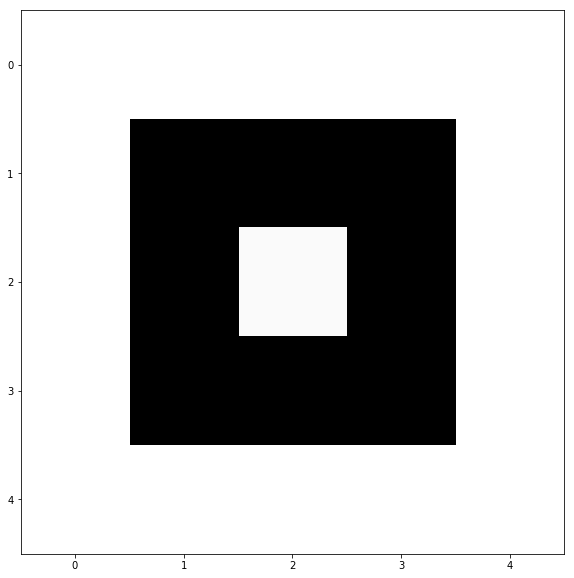

In [8]:
#lets take a numpy array
A = np.array([
             [255,255,255,255,  255],
             [255,  0,  0,  0,  255],
             [255,  0,250,  0,  255],
             [255,  0,  0,  0,  255],
             [255,255,255,255,  255]
             ])
print(A.shape)      # shape is 4 x 5 => number of pixels 20
display_image(A)  

In [9]:
npArgWhere = np.argwhere(A)  #Find the indices of array elements that are non-zero, grouped by element.
print(npArgWhere.shape)
npArgWhere  # y,x coordinates where we have non-zero (White) pixels  (found 4x2=8 non white pixels)

(17, 2)


array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [1, 0],
       [1, 4],
       [2, 0],
       [2, 2],
       [2, 4],
       [3, 0],
       [3, 4],
       [4, 0],
       [4, 1],
       [4, 2],
       [4, 3],
       [4, 4]])

In [10]:
npArgWhere = np.argwhere(A==0) 
npArgWhere.shape   # y, x coordinates where we have zero (Dark) pixels 
npArgWhere

array([[1, 1],
       [1, 2],
       [1, 3],
       [2, 1],
       [2, 3],
       [3, 1],
       [3, 2],
       [3, 3]])

In [11]:
npArgWhere = np.fliplr(npArgWhere) # x, y
npArgWhere

array([[1, 1],
       [2, 1],
       [3, 1],
       [1, 2],
       [3, 2],
       [1, 3],
       [2, 3],
       [3, 3]])

In [16]:
x, y, w, h = cv2.boundingRect(npArgWhere)  # x, y, w, h
x, y, w, h

(1, 1, 3, 3)

[[  0   0   0]
 [  0 250   0]
 [  0   0   0]]


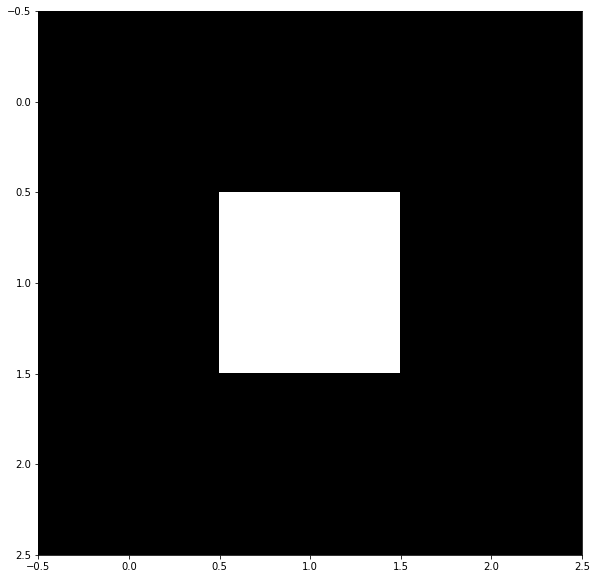

In [17]:
crop = A[y:y+h, x:x+w] # create a cropped region of the gray image
print(crop)
display_image(crop)  # croppeed object using its black border

# Function to crop the white border in an image

In [67]:
def crop_border(image):
    
    # Now applying global thresholding
    image = np.array(image)
    print('Input Image is:')
    display_image(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print('Gray:')
    display_image(gray)
    
    ret1,th1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
    #global thresholding: dark pixels are now black (near to 0) and others are white (near to 255)
    print('Applied global thresholding:')
    print(th1)
    display_image(th1)

    # find where the dark pixels to crop
    
    points = np.argwhere(th1==0)     
    ##Find the indices of array elements that are zero, grouped by element i.e. black pixels only.
    # returns y(row), x(col) coordinates or indices of each white pixels in an thresholded image
    
    print('points (y,x) of each white pixels', points)
    
    points = np.fliplr(points)   # fplip to x,y instead of y,x indices
    # fliplr : Flip array(entries in each column) in left-right direction, shape preserved
    print('After fliplr points', points)
    
    # Cropping the rectangle containing our object e.g. PAN card in this case:
    
    x, y, w, h = cv2.boundingRect(points) # create a rectangle around those points
    #cv2.boundingRect:the function calculates and returns the minimal up-right bounding rectangle 
    #for the specified point set.
    # x, y : starting points of rectangle from top to bottom and h, w are the end points
    print('Cropped image is:')
    display_image(np.array(image[y:y+h, x:x+w]))  # cropping the rectangle from starting point to end points

In [68]:
def read_image(filename):
    image = cv2.imread(filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    display_image(image)
    return image

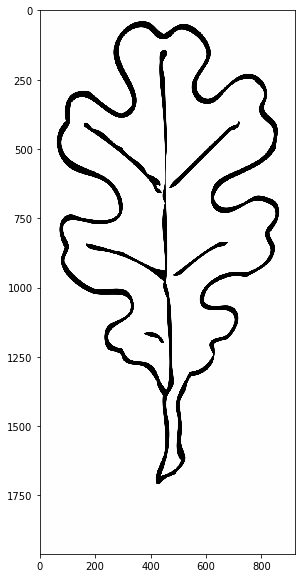

In [69]:
image = read_image("whiteBorderImage.png")

Input Image is:


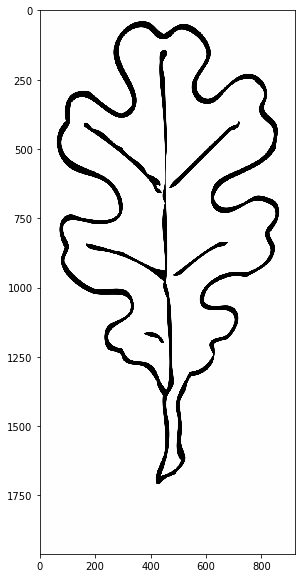

Gray:


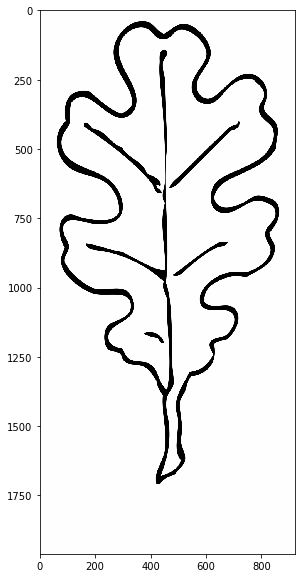

Applied global thresholding:
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


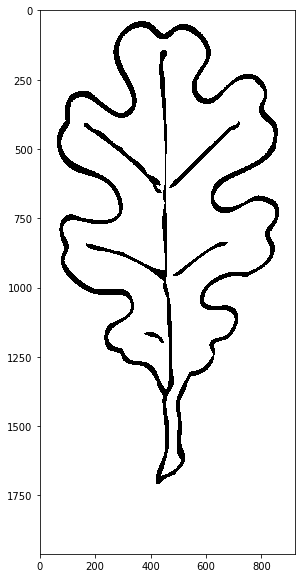

points (y,x) of each white pixels [[  40  359]
 [  40  360]
 [  40  361]
 ...
 [1709  425]
 [1709  426]
 [1709  427]]
After fliplr points [[ 359   40]
 [ 360   40]
 [ 361   40]
 ...
 [ 425 1709]
 [ 426 1709]
 [ 427 1709]]
Cropped image is:


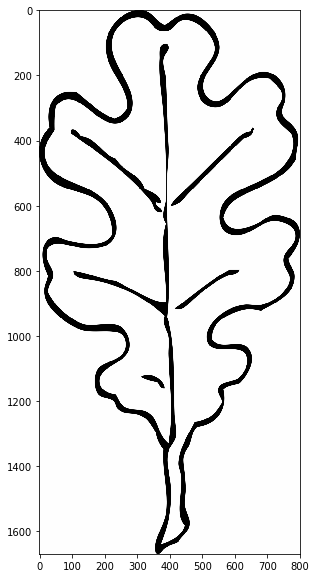

In [70]:
crop_border(image)

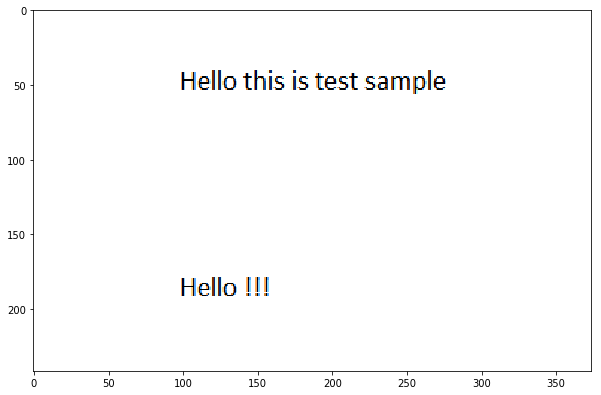

In [71]:
image = read_image("WhiteBorderTestSample2.png")

Input Image is:


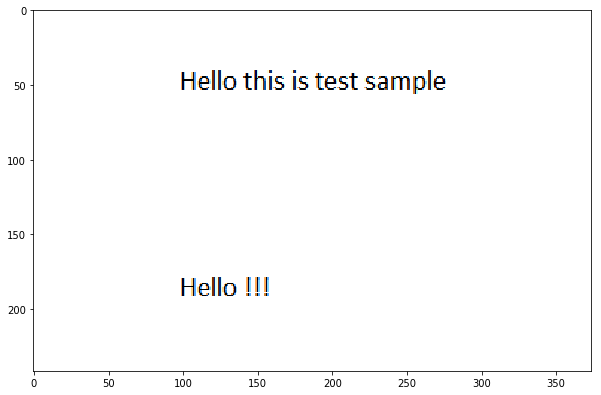

Gray:


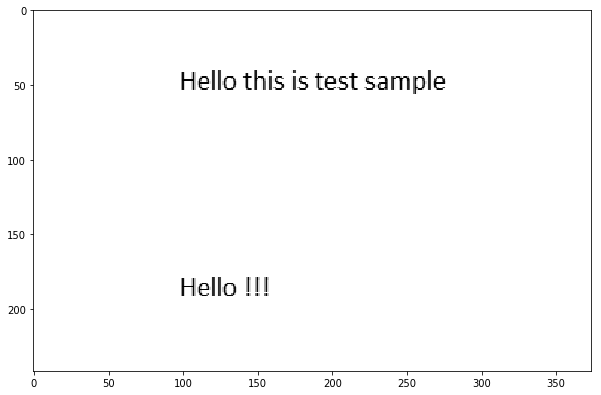

Applied global thresholding:
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


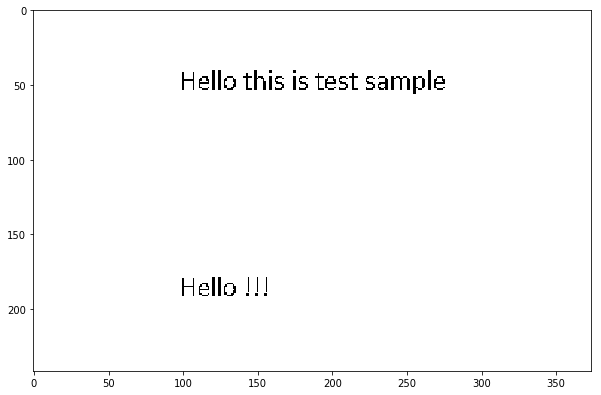

points (y,x) of each white pixels [[ 41 120]
 [ 41 121]
 [ 41 124]
 ...
 [191 150]
 [191 155]
 [191 156]]
After fliplr points [[120  41]
 [121  41]
 [124  41]
 ...
 [150 191]
 [155 191]
 [156 191]]
Cropped image is:


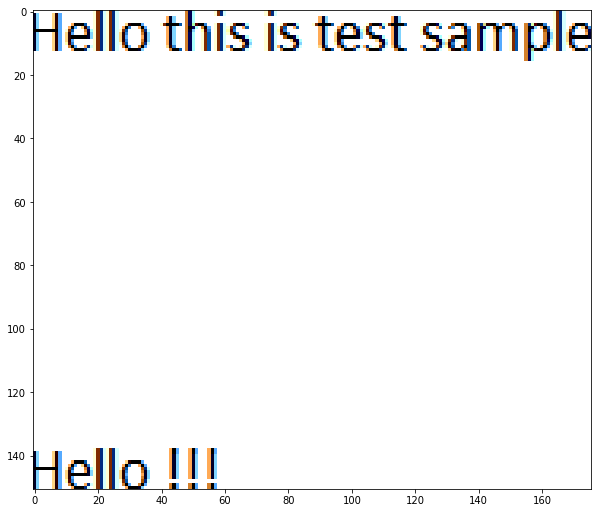

In [72]:
crop_border(image)

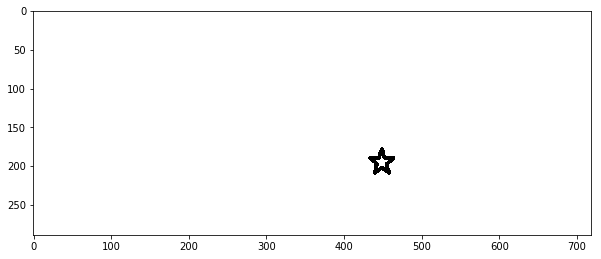

Input Image is:


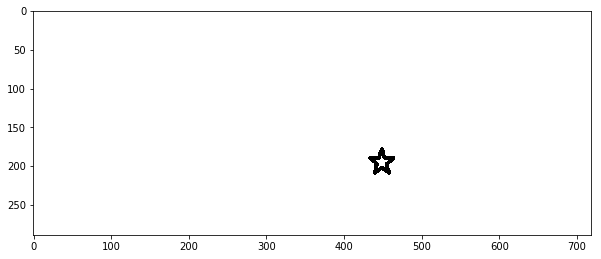

Gray:


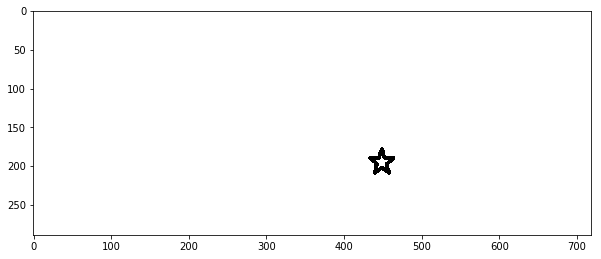

Applied global thresholding:
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


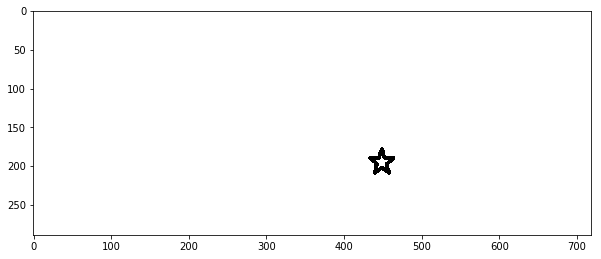

points (y,x) of each white pixels [[176 448]
 [176 449]
 [176 450]
 ...
 [211 457]
 [211 458]
 [211 459]]
After fliplr points [[448 176]
 [449 176]
 [450 176]
 ...
 [457 211]
 [458 211]
 [459 211]]
Cropped image is:


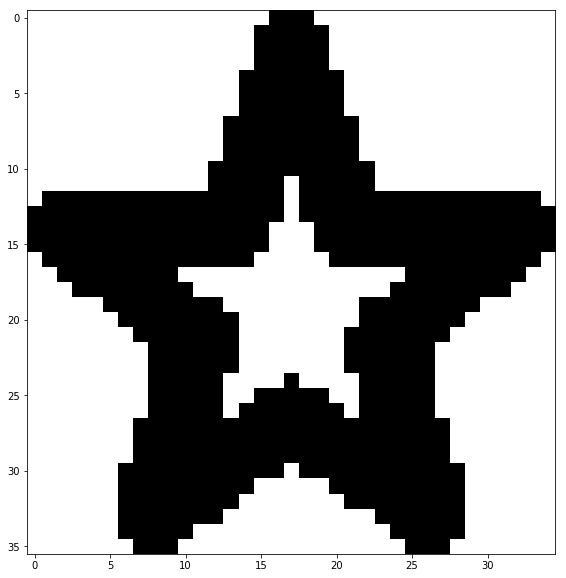

In [73]:
image = read_image("WhiteBorderTestSample3.png")
crop_border(image)

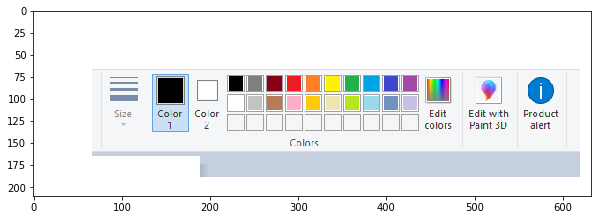

Input Image is:


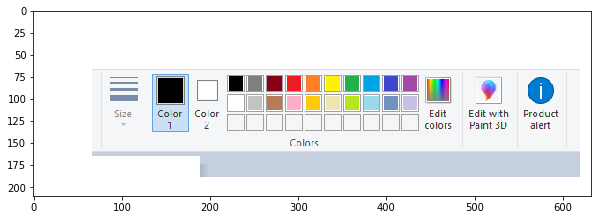

Gray:


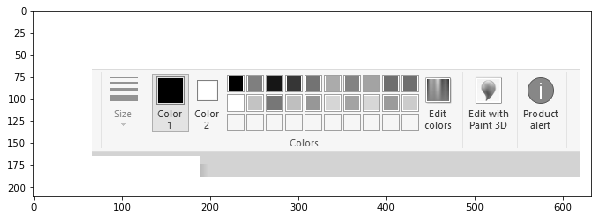

Applied global thresholding:
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


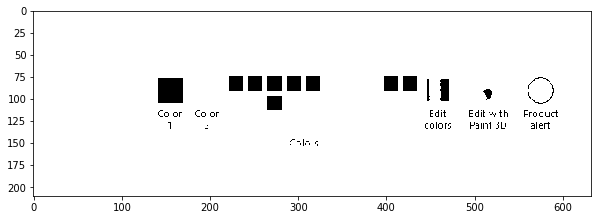

points (y,x) of each white pixels [[ 75 222]
 [ 75 223]
 [ 75 224]
 ...
 [153 316]
 [153 320]
 [153 321]]
After fliplr points [[222  75]
 [223  75]
 [224  75]
 ...
 [316 153]
 [320 153]
 [321 153]]
Cropped image is:


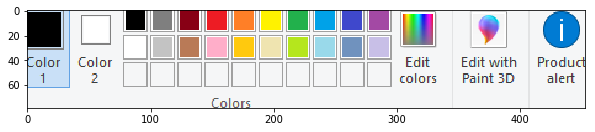

In [74]:
image = read_image("WhiteBorderTestSample4.png")
crop_border(image)

### In the last case it removed white as well as faint colours as well.
- Here one can experiment using Canny edge detection and Hough lines along with above code. For more information please check this article:
- https://limitlessdatascience.wordpress.com/2019/08/22/automatic-image-tilt-detection-using-canny-edge-and-hough-lines-and-correction/